In [2]:
# Check for missing values
print(data.isnull().sum())

# Example of handling missing values by dropping rows with missing values
data_cleaned = data.dropna()


rownames        0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64


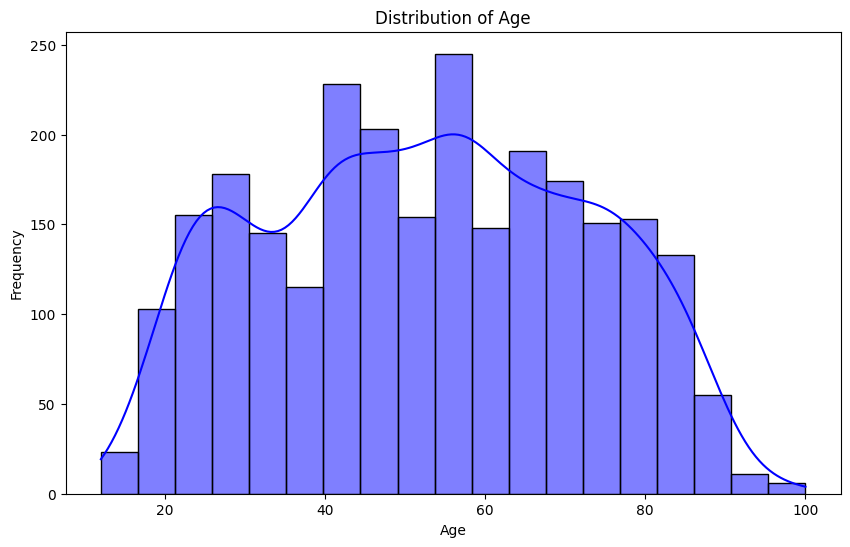

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate analysis: Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, color='blue')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


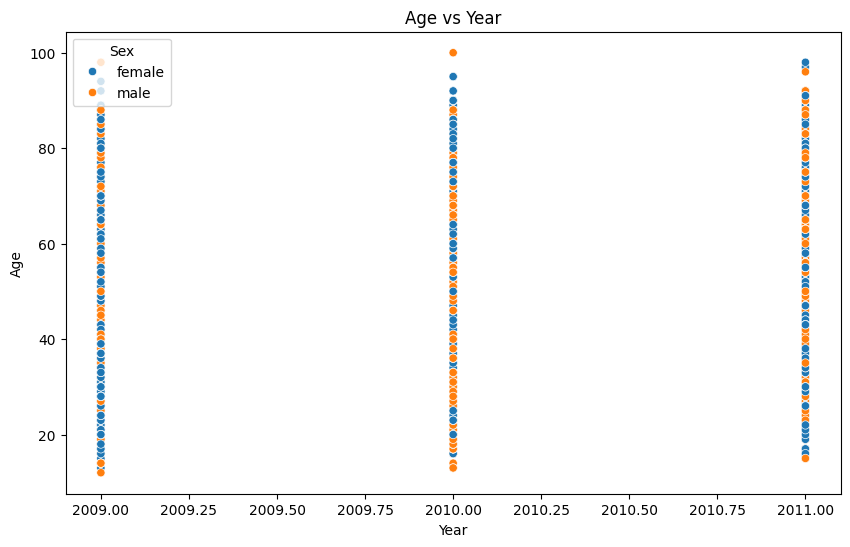

In [4]:
# Bivariate analysis: Scatter plot of Age vs Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Age', data=data, hue='Sex')
plt.title("Age vs Year")
plt.xlabel("Year")
plt.ylabel("Age")
plt.show()


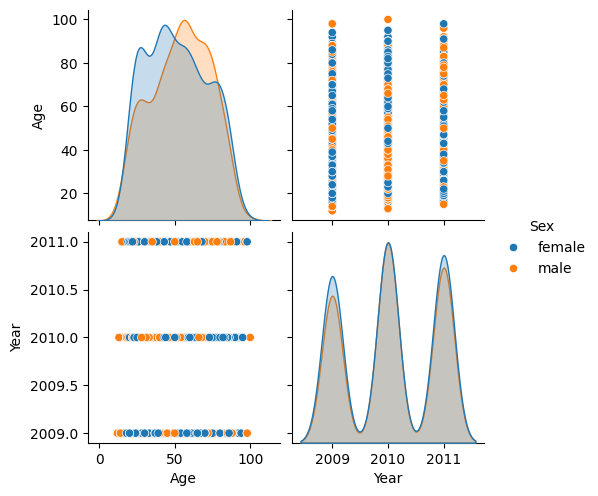

In [5]:
# Multivariate analysis: Pairplot to visualize relationships between multiple variables
sns.pairplot(data[['Age', 'Year', 'Sex']], hue='Sex')
plt.show()


In [1]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/SuicideChina.csv"
data = pd.read_csv(url)

# Explore the dataset
print("Dimension of data:", data.shape)
print("Summary of data:", data.describe())
print("First few rows:", data.head())


Dimension of data: (2571, 12)
Summary of data:           rownames    Person_ID         Year        Month          Age
count  2571.000000  2571.000000  2571.000000  2571.000000  2571.000000
mean   1286.000000  1286.000000  2010.045508     6.298327    52.630883
std     742.328095   742.328095     0.791412     3.202515    19.783878
min       1.000000     1.000000  2009.000000     1.000000    12.000000
25%     643.500000   643.500000  2009.000000     4.000000    37.000000
50%    1286.000000  1286.000000  2010.000000     6.000000    53.000000
75%    1928.500000  1928.500000  2011.000000     9.000000    69.000000
max    2571.000000  2571.000000  2011.000000    12.000000   100.000000
First few rows:    rownames  Person_ID Hospitalised Died Urban  Year  Month     Sex  Age  \
0         1          1          yes   no    no  2010     12  female   39   
1         2          2           no  yes    no  2009      3    male   83   
2         3          3           no  yes    no  2010      2    male   

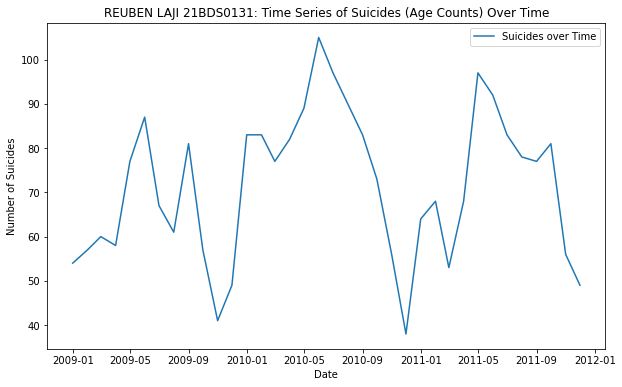

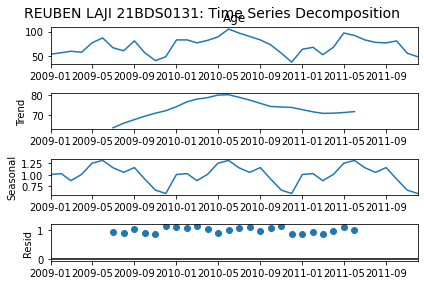

REUBEN LAJI 21BDS0131: ADF Statistic: -3.3730963870631707
REUBEN LAJI 21BDS0131: p-value: 0.011910927069714507
REUBEN LAJI 21BDS0131: The time series is stationary


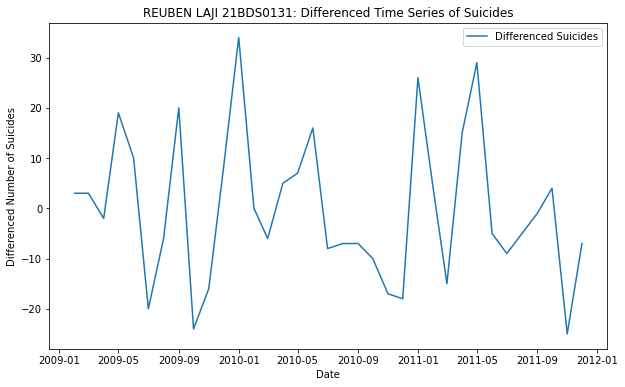

C:\Users\reube\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\reube\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\reube\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


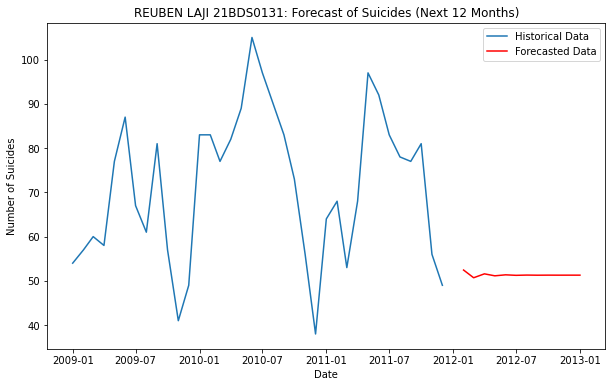

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Convert 'Year' and 'Month' into a datetime object
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Group by the 'Date' and count the number of suicides or any numeric variable for the analysis
# Here, we'll use the 'Age' variable as an example, but you can choose others.
data_grouped = data.groupby('Date').agg({'Age': 'count'}).reset_index()

# Set the 'Date' column as the index
data_grouped.set_index('Date', inplace=True)

# Visualize the data
plt.figure(figsize=(10,6))
plt.plot(data_grouped.index, data_grouped['Age'], label='Suicides over Time')
plt.title("REUBEN LAJI 21BDS0131: Time Series of Suicides (Age Counts) Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Suicides")
plt.legend()
plt.show()

# Decompose the time series to see trend, seasonal, and residual components
result = seasonal_decompose(data_grouped['Age'], model='multiplicative', period=12)
result.plot()
plt.suptitle("REUBEN LAJI 21BDS0131: Time Series Decomposition", fontsize=14)
plt.show()

# Perform Augmented Dickey-Fuller test to check for stationarity
adf_test = adfuller(data_grouped['Age'])
print("REUBEN LAJI 21BDS0131: ADF Statistic:", adf_test[0])
print("REUBEN LAJI 21BDS0131: p-value:", adf_test[1])
if adf_test[1] <= 0.05:
    print("REUBEN LAJI 21BDS0131: The time series is stationary")
else:
    print("REUBEN LAJI 21BDS0131: The time series is not stationary")

# If the series is not stationary, difference the data
data_grouped['Age_diff'] = data_grouped['Age'].diff().dropna()

# Visualize the differenced data
plt.figure(figsize=(10,6))
plt.plot(data_grouped.index[1:], data_grouped['Age_diff'][1:], label='Differenced Suicides')
plt.title("REUBEN LAJI 21BDS0131: Differenced Time Series of Suicides")
plt.xlabel("Date")
plt.ylabel("Differenced Number of Suicides")
plt.legend()
plt.show()

# Fit ARIMA model (Auto ARIMA can be used for automatic hyperparameter tuning)
model = ARIMA(data_grouped['Age'], order=(1, 1, 1))  # Here, p=1, d=1, q=1
model_fit = model.fit()

# Forecast the next 12 months (1 year)
forecast = model_fit.forecast(steps=12)
forecast_dates = pd.date_range(start=data_grouped.index[-1], periods=13, freq='M')[1:]

# Plot the forecasted values
plt.figure(figsize=(10,6))
plt.plot(data_grouped.index, data_grouped['Age'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecasted Data', color='red')
plt.title("REUBEN LAJI 21BDS0131: Forecast of Suicides (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Number of Suicides")
plt.legend()
plt.show()
